In [269]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.patches import FancyBboxPatch

In [2]:
df_nba = pd.read_excel("NBA_Stats_71_Years_Updated.xlsx")

In [3]:
df_nba.describe()

,Rank,Season Start Year,Player ID,Team ID,Games Played,Minutes Played,FG Made,FG Attempts,FG %,3-Pt FG Made,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
count,33330.000000,33330.000000,3.333000e+04,3.333000e+04,33330.000000,33330.000000,33330.000000,33330.000000,33330.000000,27034.000000,...,33330.000000,33330.000000,29101.000000,29101.000000,27764.000000,33330.000000,33330.000000,33330.000000,27764.000000,27764.000000
mean,161.710561,1995.719742,2.082683e+05,1.610613e+09,40.086019,960.490909,157.231353,343.944734,0.430644,21.960531,...,178.428083,92.251995,31.602522,19.704306,57.973527,90.646775,412.974707,466.923972,1.412649,0.573435
std,126.506757,18.247299,4.495757e+05,1.400712e+02,30.292096,938.015601,182.046117,386.508251,0.122855,40.067751,...,215.522695,128.234733,36.783506,33.218220,65.341103,84.913130,479.009729,527.363207,1.094385,0.480906
min,1.000000,1951.000000,2.000000e+00,1.610610e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,0.000000,0.000000
25%,59.000000,1983.000000,1.559000e+03,1.610613e+09,9.000000,141.000000,18.000000,43.000000,0.391000,0.000000,...,22.000000,8.000000,4.000000,1.000000,7.000000,15.000000,48.000000,54.000000,0.690000,0.310000
50%,130.000000,1998.000000,7.686150e+04,1.610613e+09,39.000000,590.500000,79.000000,181.000000,0.440000,3.000000,...,95.000000,39.000000,17.000000,7.000000,32.000000,60.000000,209.000000,244.000000,1.220000,0.500000
75%,240.000000,2011.000000,2.007580e+05,1.610613e+09,72.000000,1687.000000,247.000000,546.000000,0.488000,24.000000,...,261.000000,126.000000,49.000000,23.000000,91.000000,155.000000,645.000000,747.000000,1.950000,0.730000
max,582.000000,2022.000000,1.641645e+06,1.610613e+09,85.000000,3882.000000,1597.000000,3159.000000,1.000000,402.000000,...,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000,4183.000000,21.000000,8.000000


In [330]:
df_nba["3-Pt FG %"].describe()

count    27034.000000
mean         0.212694
std          0.196375
min          0.000000
25%          0.000000
50%          0.250000
75%          0.357000
max          1.000000
Name: 3-Pt FG %, dtype: float64

In [344]:
df_nba["FG %"].describe()

count    33330.000000
mean         0.430644
std          0.122855
min          0.000000
25%          0.391000
50%          0.440000
75%          0.488000
max          1.000000
Name: FG %, dtype: float64

In [345]:
df_nba["Points Scored"].describe()

count    33330.000000
mean       412.974707
std        479.009729
min          0.000000
25%         48.000000
50%        209.000000
75%        645.000000
max       4029.000000
Name: Points Scored, dtype: float64

In [347]:
points_90 = df_nba['Points Scored'].quantile(0.9)
print(points_90)

1134.0


In [332]:
correlation_points_assists = df_nba['Points Scored'].corr(df_nba['Assists'])
print(correlation_points_assists)

0.7552181373471663


In [335]:
correlation_points_reb = df_nba['Points Scored'].corr(df_nba['Rebounds'])
print(correlation_points_reb)

0.7758575175161526


In [337]:
correlation_points_steal = df_nba['Points Scored'].corr(df_nba['Steals'])
print(correlation_points_steal)

0.8230045835357012


In [339]:
correlation_points_turn = df_nba['Points Scored'].corr(df_nba['Turnovers'])
print(correlation_points_turn)

0.922494463348598


In [340]:
correlation_points_mins = df_nba['Points Scored'].corr(df_nba['Minutes Played'])
print(correlation_points_mins)

0.9350264835760946


In [341]:
correlation_points_foul = df_nba['Points Scored'].corr(df_nba['Personal Fouls'])
print(correlation_points_foul)

0.809409213230347


In [342]:
correlation_points_FG_att = df_nba['Points Scored'].corr(df_nba['FG Attempts'])
print(correlation_points_FG_att)

0.9896724390038178


In [343]:
correlation_points_3FG_att = df_nba['Points Scored'].corr(df_nba['3-Pt FG Attempts'])
print(correlation_points_3FG_att)

0.5816237487200665


In [338]:
df_nba.columns

Index(['Rank', 'Year', 'Season Start Year', 'Season Type', 'Player ID',
       'Player', 'Team ID', 'Team', 'Games Played', 'Minutes Played',
       'FG Made', 'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts',
       '3-Pt FG %', 'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points Scored', 'Efficiency', 'AST/TOV',
       'STL/TOV'],
      dtype='object')

In [327]:
points_summed = df_nba.groupby('Player')['Points Scored'].sum()

top_players = points_summed.sort_values(ascending=False).head(5)

df_top = pd.DataFrame({'Player': top_players.index, 'TotalPoints': top_players.values})

df_top

,Player,TotalPoints
0,LeBron James,46675
1,Kareem Abdul-Jabbar,44149
2,Karl Malone,41689
3,Kobe Bryant,39283
4,Michael Jordan,38279


In [329]:
df_nba.isnull().sum()

Rank                     0
Year                     0
Season Start Year        0
Season Type              0
Player ID                0
Player                   0
Team ID                  0
Team                     0
Games Played             0
Minutes Played           0
FG Made                  0
FG Attempts              0
FG %                     0
3-Pt FG Made          6296
3-Pt FG Attempts      6296
3-Pt FG %             6296
FT Made                  0
FT Attempts              0
FT %                     0
Offensive Rebounds    4229
Defensive Rebounds    4229
Rebounds                 0
Assists                  0
Steals                4229
Blocks                4229
Turnovers             5566
Personal Fouls           0
Points Scored            0
Efficiency               0
AST/TOV               5566
STL/TOV               5566
dtype: int64

In [4]:
df_nba["Season Type"].unique()

array(['Regular Season', 'Playoffs'], dtype=object)

In [5]:
df_nba.rename(columns={"Efficency":"Efficiency"},inplace=True)

In [6]:
df_copy = df_nba.copy()

In [7]:
df_copy.drop(columns=["Player ID","Team ID","Team"],inplace=True)

In [141]:
df_copy['FG % Rank'] = df_copy["FG %"].rank(pct = True)
#percentile rank of FG %

df_copy['3-Pt FG % Rank'] = df_copy["3-Pt FG %"].rank(pct = True)

df_copy['Minutes Played Rank'] = df_copy["Minutes Played"].rank(pct = True)

df_copy['Rebounds Rank'] = df_copy["Rebounds"].rank(pct = True)

df_copy['Assists Rank'] = df_copy["Assists"].rank(pct = True)

df_copy['Blocks Rank'] = df_copy["Blocks"].rank(pct = True)

In [17]:
df_rank = df_copy.copy()

In [18]:
df_rank.drop(columns=["Games Played","Minutes Played","FG Made","FG Attempts","FG %"],inplace=True)

In [19]:
df_rank.drop(columns=["3-Pt FG Made","3-Pt FG Made","FT Made","FT Attempts","Efficiency","AST/TOV","STL/TOV"],inplace=True)

In [20]:
df_rank.drop(columns=["3-Pt FG Attempts","FT %","Offensive Rebounds","Defensive Rebounds","Steals","Rebounds","Turnovers","Personal Fouls"],inplace=True)

In [21]:
df_rank.drop(columns=["3-Pt FG %","Assists","Blocks","Season Type","Player","Points Scored","Year","Rank","Season Start Year"],inplace=True)

In [22]:
df_rank

,FG % Rank,3-Pt FG % Rank,Minutes Played Rank,Rebounds Rank,Assists Rank,Blocks Rank
0,0.545935,NaN,0.971887,0.972787,0.816982,NaN
1,0.230498,NaN,0.919712,0.985539,0.845110,NaN
2,0.184863,NaN,0.936784,0.876568,0.970852,NaN
3,0.452430,NaN,0.929043,0.922037,0.881803,NaN
4,0.224542,NaN,0.888869,0.657111,0.959676,NaN
...,...,...,...,...,...,...
33325,0.015227,0.186913,0.018257,0.011056,0.028638,0.082849
33326,0.015227,0.186913,0.001935,0.011056,0.028638,0.082849
33327,0.015227,0.186913,0.009661,0.032553,0.028638,0.082849
33328,0.015227,0.186913,0.038284,0.067852,0.077903,0.082849


In [61]:
df_nba.loc[(df_nba["Player"] == 'Kobe Bryant') & (df_nba["Season Type"] == "Regular Season")].index

Int64Index([15249, 15741, 16333, 16971, 17574, 18200, 18822, 19450, 20077,
            20719, 21371, 22019, 22674, 23320, 23958, 24602, 25282, 26342,
            26759, 27386],
           dtype='int64')

In [62]:
df_nba.loc[(df_nba["Player"] == 'Kobe Bryant') & (df_nba["Season Type"] == "Playoffs")].index

Int64Index([15572, 16178, 16776, 17389, 18010, 18639, 19254, 19879, 21204,
            21861, 22470, 23117, 23757, 24419, 25084],
           dtype='int64')

In [63]:
df_Kobe = df_rank.copy()
df_Kobe_regular = df_Kobe.loc[[15249, 15741, 16333, 16971, 17574, 18200, 18822, 19450, 20077,
            20719, 21371, 22019, 22674, 23320, 23958, 24602, 25282, 26342,
            26759, 27386]]

df_Kobe_playoffs = df_Kobe.loc[[15572, 16178, 16776, 17389, 18010, 18639, 19254, 19879, 21204,
            21861, 22470, 23117, 23757, 24419, 25084]]

In [85]:
FG = sum(df_Kobe_regular["Minutes Played Rank"])/len(df_Kobe_regular)
FG

0.8676627662766278

In [74]:
Kobe_Playoffs = [0.517886788678868,0.6747108579319867,0.49103238147600886,0.4237143714371438,0.5757885788578857,0.4688988898889888]

In [86]:
Kobe_regular = [0.5164701470147015,0.647689021232522,0.7598295591216797,0.7983693369336933,0.895491299129913,0.8676627662766278]

In [92]:
df_kobe = pd.DataFrame(data=[Kobe_regular,Kobe_Playoffs],columns=df_rank.columns)

In [93]:
df_kobe

,FG % Rank,3-Pt FG % Rank,Minutes Played Rank,Rebounds Rank,Assists Rank,Blocks Rank
0,0.516470,0.647689,0.759830,0.798369,0.895491,0.867663
1,0.517887,0.674711,0.491032,0.423714,0.575789,0.468899


In [205]:
#a = df_kobe.loc[0].sort_values()
a = df_kobe.loc[0]

In [206]:
b = df_kobe.loc[1]

In [207]:
df_updated = pd.DataFrame([a,b])

In [210]:
df_updated

,FG % Rank,3-Pt FG % Rank,Minutes Played Rank,Rebounds Rank,Assists Rank,Blocks Rank
0,0.516470,0.647689,0.759830,0.798369,0.895491,0.867663
1,0.517887,0.674711,0.491032,0.423714,0.575789,0.468899


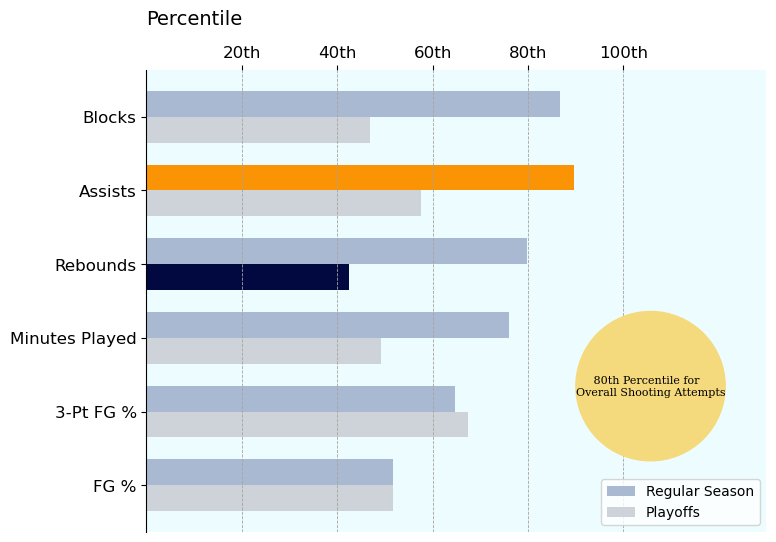

In [311]:
fig, ax = plt.subplots(figsize=(8, 6))
w = 0.35  # Use 33 of per bar and leave 33 for spacing
y = np.arange(0, 6)  # The y-coordinates for the bars

ax.set_xlim(0,1.3)

#setting bars
ax.barh(y+w, df_updated.loc[0], height=w, color='#a9b9d1', label="Regular Season")
ax.barh(y, df_updated.loc[1], height=w, color='#ced2d9', label="Playoffs")

#highlight bars
#ax.barh(y[3]+w,0.798369, height=w, color='#fa9405')
ax.barh(y[4]+w, 0.895491, height=w, color='#fa9405')
ax.barh(y[3], 0.423714, height=w, color='#010940')

# Set the y-ticks and labels
ax.set_yticks(y + w / 2)
ax.set_yticklabels(['FG %','3-Pt FG %','Minutes Played','Rebounds','Assists','Blocks'],fontsize=12)

#set labels and hide extra axis 
ax.set_xlabel("Percentile",fontsize=14,loc="left")
#ax.set_title('Kobe Bryant Career Regular Season & Playoff Statistics by Percentiles',fontweight="bold",pad=20,fontsize=14,loc="left")

ax.xaxis.labelpad = 15 #make some space between x axis and graph

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.axvline(x=0.2, color='#a6a4a1', linestyle='--',linewidth=0.6)
plt.axvline(x=0.4, color='#a6a4a1', linestyle='--',linewidth=0.6)
plt.axvline(x=0.6, color='#a6a4a1', linestyle='--',linewidth=0.6)
plt.axvline(x=0.8, color='#a6a4a1', linestyle='--',linewidth=0.6)
plt.axvline(x=1.0, color='#a6a4a1', linestyle='--',linewidth=0.6)

bubble_props = dict(boxstyle="circle,pad=0.05", facecolor="#f5d97d", edgecolor="none")
ax.text(0.9, 1.4, "     80th Percentile for \nOverall Shooting Attempts",
        fontsize=8, fontname='serif', bbox=bubble_props)

ax.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0])  # Define the tick positions
ax.set_xticklabels(['20th', '40th', '60th', '80th', '100th'], fontsize=12) 

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

ax.set_facecolor(color='#edfdff')

plt.legend(loc="lower right",fontsize=10)  # Use labels from barh() calls

plt.show()

In [182]:
df_nba.loc[(df_nba["Player"] == 'LeBron James') & (df_nba["Season Type"] == "Regular Season")].index

Int64Index([19444, 20069, 20720, 21372, 22020, 22673, 23317, 23957, 24601,
            25283, 25960, 26646, 27346, 28042, 28735, 29512, 30234, 31018,
            31762, 32598],
           dtype='int64')

In [183]:
df_nba.loc[(df_nba["Player"] == 'LeBron James') & (df_nba["Season Type"] == "Playoffs")].index

Int64Index([21182, 21829, 22476, 23118, 23764, 24410, 25078, 25749, 26441,
            27135, 27820, 28520, 29275, 30757, 31556, 33120],
           dtype='int64')

In [184]:
df_James = df_rank.copy()
df_James_regular = df_James.loc[[19444, 20069, 20720, 21372, 22020, 22673, 23317, 23957, 24601,
            25283, 25960, 26646, 27346, 28042, 28735, 29512, 30234, 31018,
            31762, 32598]]

df_James_playoffs = df_James.loc[[21182, 21829, 22476, 23118, 23764, 24410, 25078, 25749, 26441,
            27135, 27820, 28520, 29275, 30757, 31556, 33120]]

In [196]:
BG = sum(df_James_playoffs["Minutes Played Rank"])/len(df_James_playoffs)
BG

0.5317863036303632

In [198]:
Lebron_regular = [0.7978547854785479,0.7126673818154916,0.8861929143328411,0.918476597659766,0.9786446144614462,0.9255385538553856]

In [197]:
Lebron_playoffs = [0.7308571482148214,0.6966285510838204,0.6575064001237071,0.6031137488748877,0.7371118361836183,0.5317863036303632]

In [202]:
df_james = pd.DataFrame(data=[Lebron_regular,Lebron_playoffs],columns=df_rank.columns)

In [216]:
c = df_james.loc[0]
d = df_james.loc[1]
df_updated1 = pd.DataFrame([c,d])
df_updated1

,FG % Rank,3-Pt FG % Rank,Minutes Played Rank,Rebounds Rank,Assists Rank,Blocks Rank
0,0.797855,0.712667,0.886193,0.918477,0.978645,0.925539
1,0.730857,0.696629,0.657506,0.603114,0.737112,0.531786


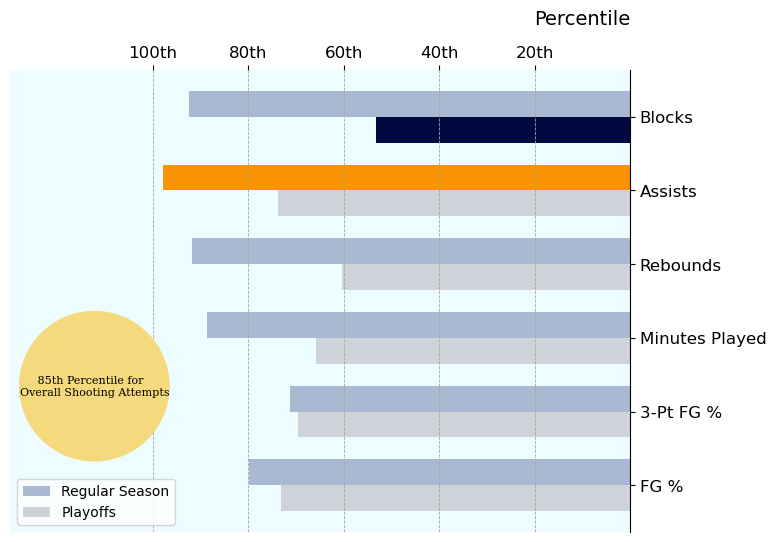

In [312]:
fig, ax = plt.subplots(figsize=(8, 6))
w = 0.35  # Use 33 of per bar and leave 33 for spacing
y = np.arange(0, 6)  # The y-coordinates for the bars

ax.set_xlim(1.3, 0)  # Reverse the x-axis limits

# Setting bars
ax.barh(y+w, df_updated1.loc[0], height=w, color='#a9b9d1', label="Regular Season")
ax.barh(y, df_updated1.loc[1], height=w, color='#ced2d9', label="Playoffs")

# Highlight bars
ax.barh(y[4]+w, 0.978645, height=w, color='#fa9405')
ax.barh(y[5], 0.531786, height=w, color='#010940')

# Set the y-ticks and labels on the right y-axis
ax.set_yticks(y + w / 2)
ax.set_yticklabels(['FG %','3-Pt FG %','Minutes Played','Rebounds','Assists','Blocks'], fontsize=12)

# Set labels and hide extra axes
ax.set_xlabel("Percentile", fontsize=14, loc="right")  # Align the xlabel to the right
#ax.set_title('LeBron James Regular Career Season & Playoff Statistics by Percentiles',
             #fontweight="bold", pad=20, fontsize=14, loc="right")  # Align the title to the right

ax.xaxis.labelpad = 15  # Make some space between x axis and graph

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)  # Hide the right spine instead of the left
ax.spines['bottom'].set_visible(False)


plt.axvline(x=0.2, color='#a6a4a1', linestyle='--',linewidth=0.6)
plt.axvline(x=0.4, color='#a6a4a1', linestyle='--',linewidth=0.6)
plt.axvline(x=0.6, color='#a6a4a1', linestyle='--',linewidth=0.6)
plt.axvline(x=0.8, color='#a6a4a1', linestyle='--',linewidth=0.6)
plt.axvline(x=1.0, color='#a6a4a1', linestyle='--',linewidth=0.6)

#drawing bubble
bubble_props = dict(boxstyle="circle,pad=0.05", facecolor="#f5d97d", edgecolor="none")
ax.text(1.28, 1.4, "     85th Percentile for \nOverall Shooting Attempts",
        fontsize=8, fontname='serif', bbox=bubble_props)

ax.set_xticks([1.0, 0.8, 0.6, 0.4, 0.2])  # Define the tick positions in reverse order
ax.set_xticklabels(['100th', '80th', '60th', '40th', '20th'], fontsize=12)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

ax.set_facecolor(color='#edfdff')

# Move y-axis labels and ticks to the right side
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

plt.legend(loc="lower left", fontsize=10)  # Use labels from barh() calls

plt.show()


In [292]:
df_nba.rank(pct=True).loc[df_nba["Player"] == "Kobe Bryant"]["FG Attempts"].mean()

0.769119197634049

In [248]:
df_nba.columns

Index(['Rank', 'Year', 'Season Start Year', 'Season Type', 'Player ID',
       'Player', 'Team ID', 'Team', 'Games Played', 'Minutes Played',
       'FG Made', 'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts',
       '3-Pt FG %', 'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points Scored', 'Efficiency', 'AST/TOV',
       'STL/TOV'],
      dtype='object')

In [293]:
(0.8166113571270041 + 0.769119197634049) / 2

0.7928652773805265